<a href="https://colab.research.google.com/github/hyuntaedo/Deep_learning/blob/main/Wine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as gbm

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Data_Folder/data/Data_Folder/wine_quality_classification/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data_Folder/data/Data_Folder/wine_quality_classification/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Data_Folder/data/Data_Folder/wine_quality_classification/sample_submission.csv')

## 데이터 확인

In [ ]:
train.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


- text를 제외한 나머지 13개의 변수를 가짐

In [ ]:
test.head(3)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,white


- test는 quality를 제외한 12개의 변수를 가짐

## 결측치 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


- 두개의 데이터 셋에는 결측치가 없음

## 상관 관계


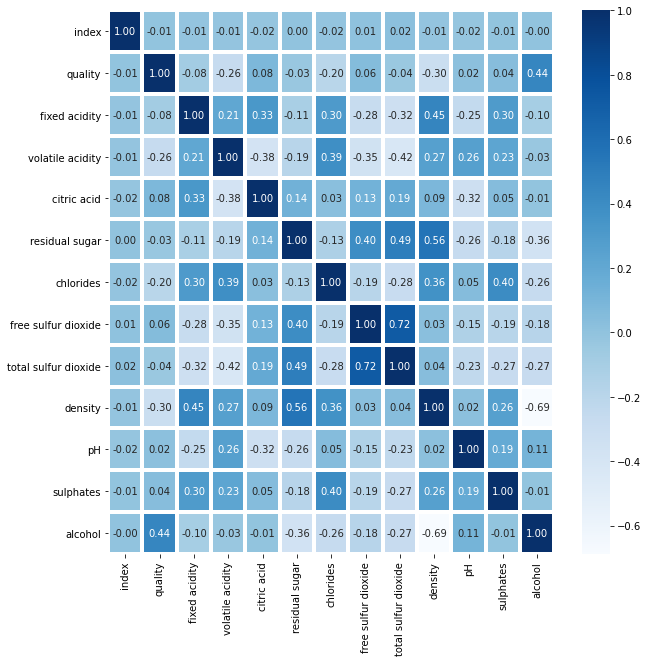

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(train.corr(),annot=True,fmt='.2f',linewidths=3,cmap='Blues')

- quality와 alchole의 상관 관계는 높다는 것을 알 수 있음
- fixed acidity와 density의 상관관계가 높다는 것을 알 수 있음
- residure sugar와 density의 상관관계가 높다는 것을 알 수 있음
- free sulfur dioxide와 total sulfer dioxide의 상관관계는 매우 높다는 것을 알 수 있음

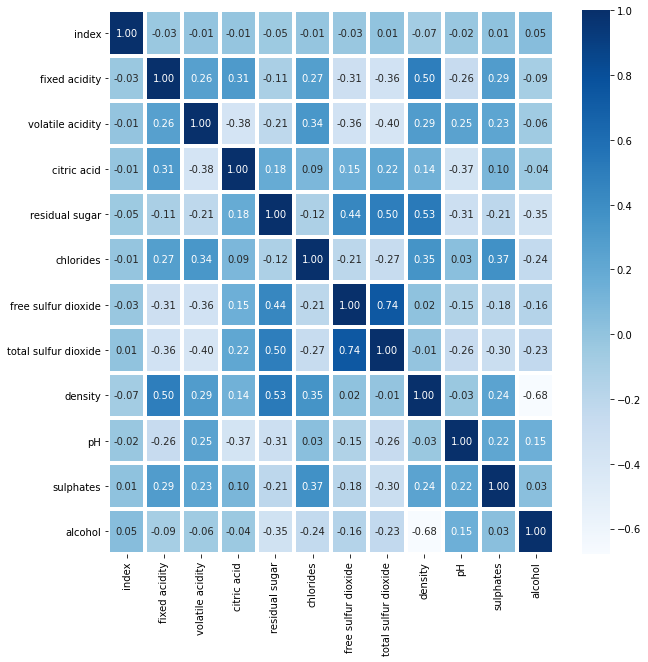

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(test.corr(),annot=True,linewidths=3,fmt='.2f',cmap='Blues')

- train의 상관관계도와 매우 유사함 거의 같다고 볼 수 있음

### 각 변수별 분포표

#### train의 각 변수별 분포표

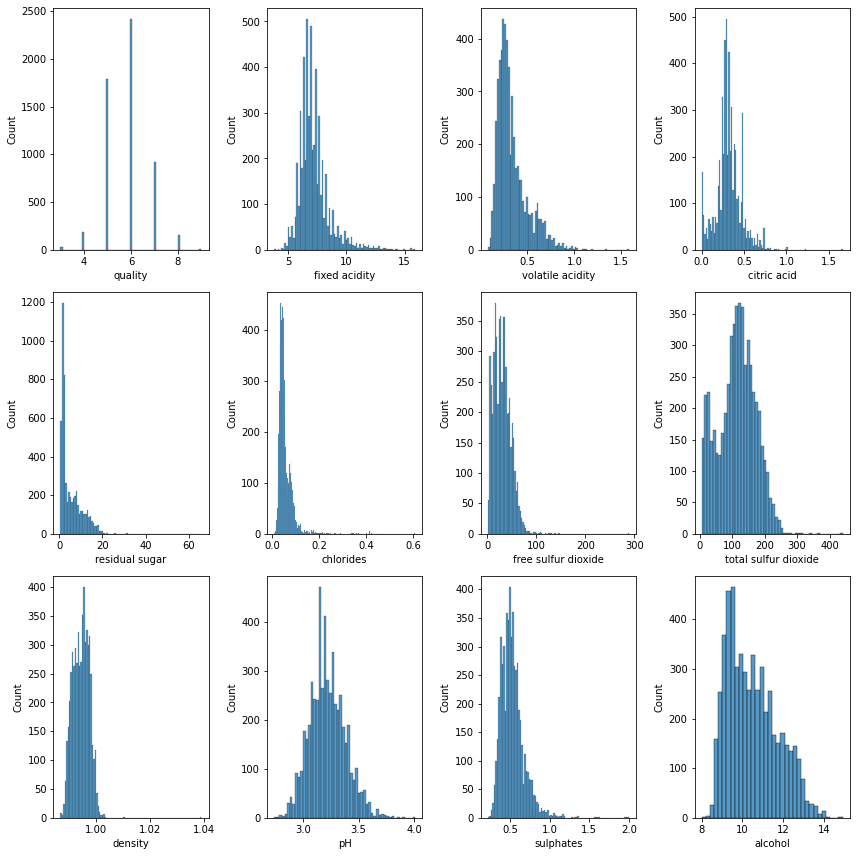

In [ ]:
plt.figure(figsize=[12,12])
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.histplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

#### test의 각 변수별 분포표

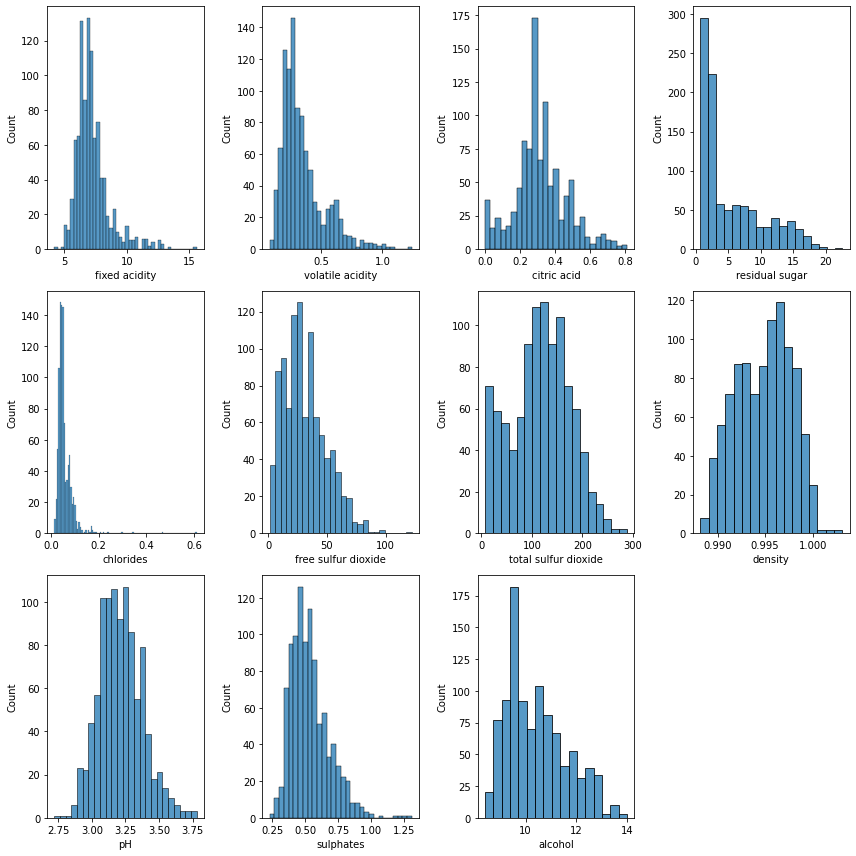

In [ ]:
plt.figure(figsize=[12,12])
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.histplot(test.iloc[:,i])
plt.tight_layout()
plt.show()

- 각 변수와 quality사이의 분포

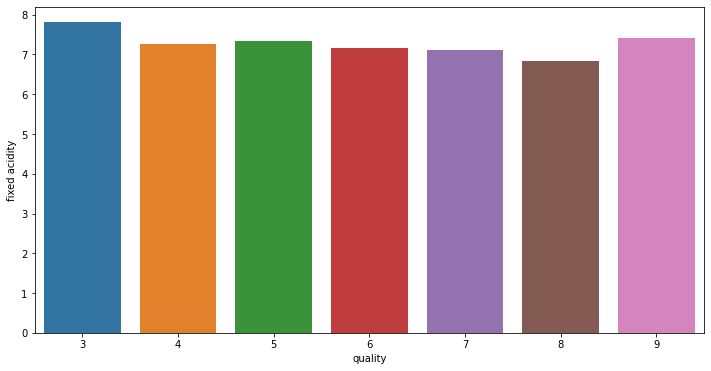

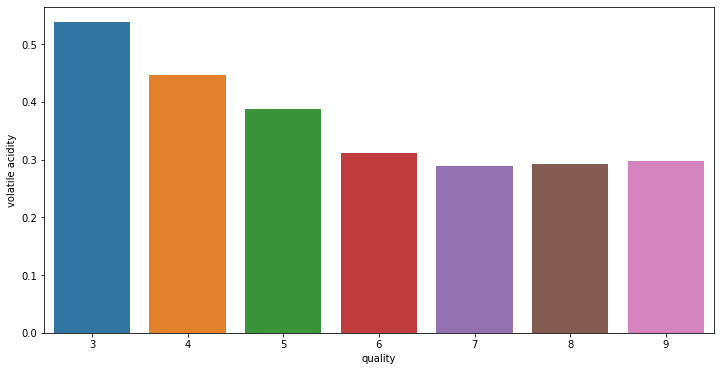

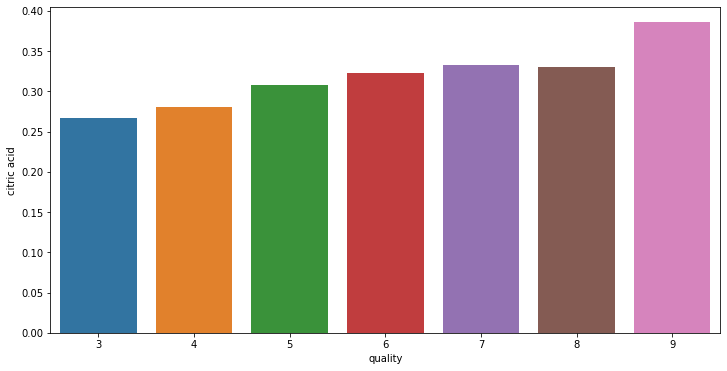

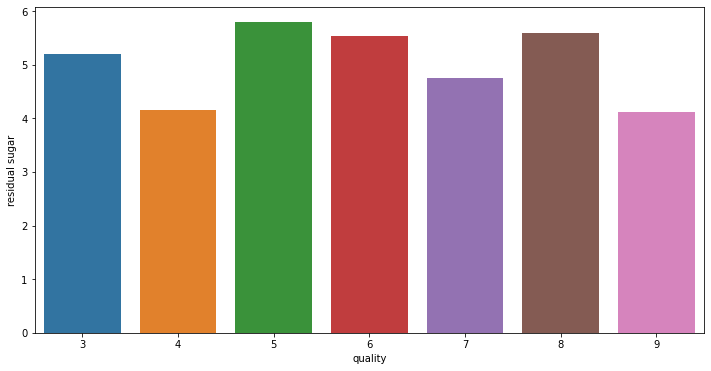

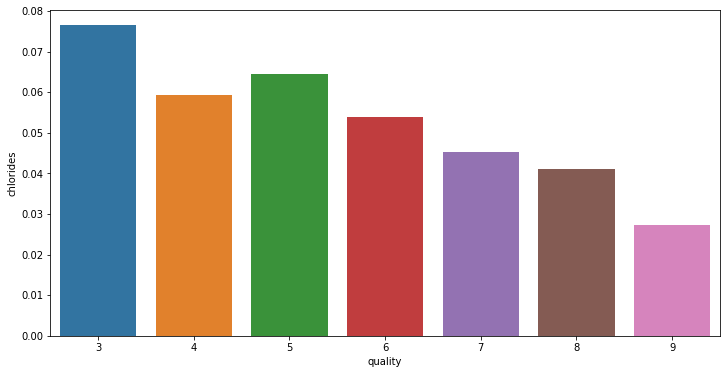

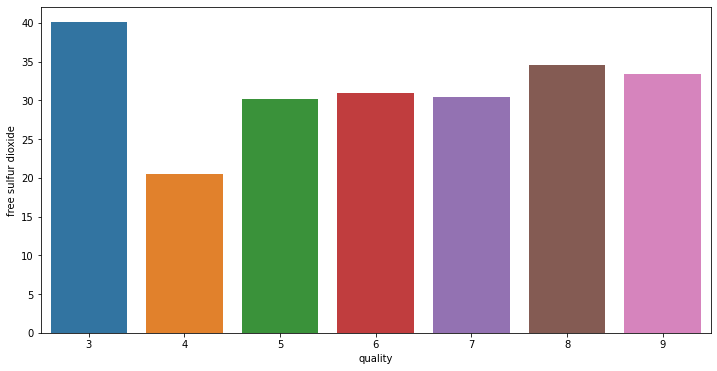

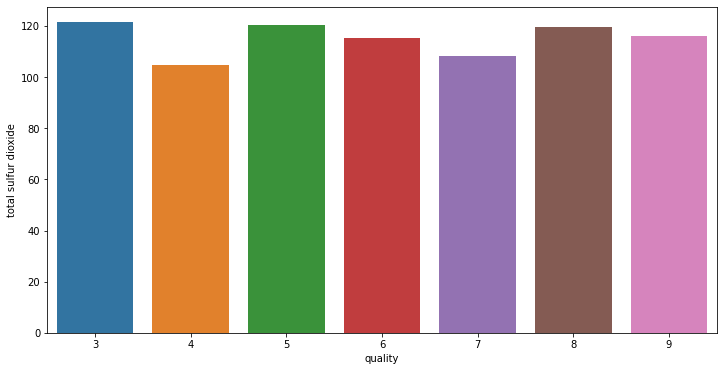

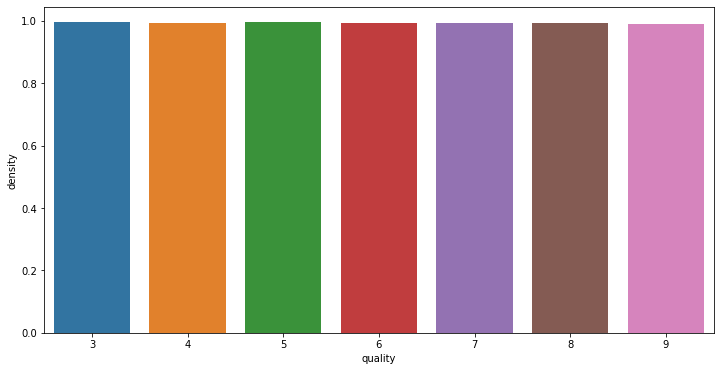

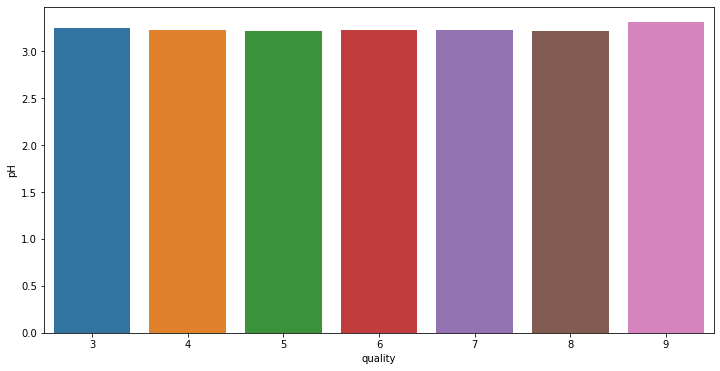

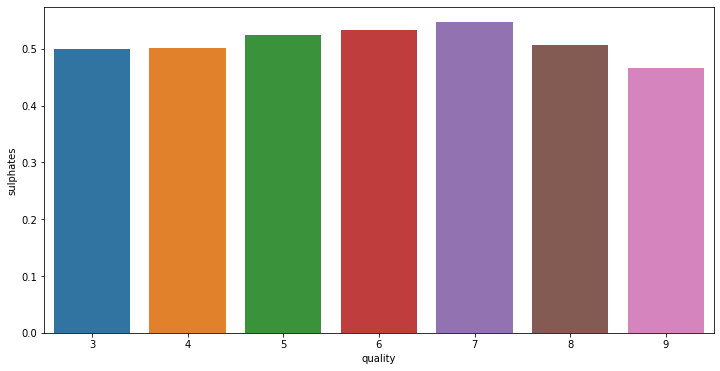

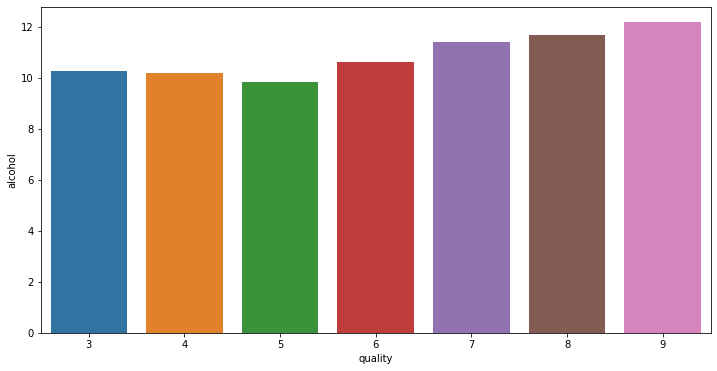

In [ ]:
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y=train.columns[i+2], data=train,ci=None)

## Model

In [ ]:
print(train.isna().sum())
print('='*100)
print(test.isna().sum())

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


In [ ]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0


In [ ]:
X_train = train.drop(['index','quality'],axis=1)
y_train = train['quality']
X_test = test.drop(['index'],axis=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(5497, 12)
(5497,)
(1000, 12)


In [ ]:
model = gbm.LGBMClassifier()
model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[5 5 5 5 6 6 6 6 6 7 6 5 7 6 6 5 6 6 6 5 6 6 5 7 6 5 5 5 5 5 7 6 5 5 5 6 5
 5 6 6 6 5 6 5 6 6 5 6 4 6 5 5 6 4 5 6 6 5 5 6 5 6 6 4 6 6 5 5 6 5 5 5 5 5
 6 5 6 7 6 7 6 6 5 5 6 6 5 5 6 7 6 6 6 6 6 7 6 6 6 6 5 5 6 5 5 6 6 6 6 5 6
 6 6 5 5 6 6 7 7 6 6 5 6 6 5 5 6 6 6 7 5 5 6 5 5 6 6 7 5 5 5 6 5 5 5 5 7 6
 8 6 5 8 6 5 6 5 5 6 6 5 5 6 6 7 6 5 5 6 5 5 5 6 6 5 6 5 6 5 6 6 6 5 7 7 5
 6 6 6 5 6 6 5 5 6 6 6 7 5 5 5 6 5 6 5 5 5 6 6 6 6 7 5 5 6 6 6 5 6 6 6 6 5
 6 6 7 6 6 5 6 5 6 7 7 6 6 6 6 6 6 6 6 6 6 6 7 6 6 7 5 7 5 6 7 7 6 6 6 7 6
 6 7 5 5 7 5 5 6 5 6 6 6 5 5 5 6 5 7 7 5 6 6 6 6 6 7 7 6 6 6 6 5 5 5 6 5 6
 8 5 5 7 6 6 5 5 6 5 5 7 5 5 6 5 5 5 6 6 5 5 5 5 5 5 6 5 4 5 5 6 6 5 5 7 7
 5 5 7 5 6 6 6 6 6 7 6 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 6 5 6 6 7 7 6 5 5 7 6
 6 5 5 5 6 5 6 6 6 6 6 6 7 6 5 6 6 5 6 5 7 5 7 6 5 6 6 7 7 5 7 6 6 6 6 6 6
 6 6 6 6 5 6 5 6 6 6 6 5 6 7 6 5 6 5 6 6 6 5 6 7 6 5 6 6 4 6 5 5 5 5 7 6 5
 6 6 5 5 5 6 6 7 5 6 6 6 7 5 6 5 6 6 5 6 5 6 6 6 6 5 5 5 5 6 5 6 6 8 7 6 6
 7 5 5 8 5 5 6 5 6 7 6 5 

In [ ]:
submission['quality'] = y_pred

In [ ]:
submission

,index,quality
0,0,5
1,1,5
2,2,5
3,3,5
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [ ]:
submission.to_csv('submission.csv',index=False)